In [1]:
import numpy as np
import cv2
import glob
import random
import matplotlib.pyplot as plt
import time
import math
import copy
import heapq

In [2]:
resolution = 1
length = 250
breadth = 150
map = np.zeros((breadth,length))
# plt.imshow(map,cmap='binary')

In [3]:
# x = list(range(0,length))
# y = list(range(0,breadth))
# y-5

def inside_rect(x,y,pad):
    if(not pad):
        if(y-112.5<=0 and x-100<=0 and -y+67.5<=0 and -x+50<=0):
            return True
        else:
            return False
    else:
        if(y-117.5<=0 and x-105<=0 and -y+62.5<=0 and -x+45<=0):
            return True
        else:
            return False

In [4]:
def inside_circle(x,y,pad):
    if(not pad):
        if((x-190)**2+(y-130)**2-15**2<=0):
            return True
        else:
            return False
    else:
        if((x-190)**2+(y-130)**2-20**2<=0):
            return True
        else:
            return False

In [5]:
def inside_ellipse(x,y,pad):
    if(not pad):
        if((x-140)**2*(6**2)+(y-120)**2*(15**2)-(15**2)*(6**2)<=0):
            return True
        else:
            return False
    else:
        if((x-140)**2*(11**2)+(y-120)**2*(20**2)-(20**2)*(11**2)<=0):
            return True
        else:
            return False

In [6]:
def inside_poly(x,y,pad):
    if(not pad):
        if(-41*x-25*y+6525<=0 and 38*x+23*y-8530<=0 and 37*x-20*y-6101<=0 and -y+15<=0 and (4*x+38*y-2628<=0 or -38*x+7*y+5830<=0)):
            return True
        else:
            return False
    else:
        if(-41*x-25*y+6284.9<=0 and 38*x+23*y-8752.09<=0 and 37*x-20*y-6311.29<=0 and -y+10<=0 and (4*x+38*y-2819.05<=0 or -38*x+7*y+5636.8<=0)):

            return True
        else:
            return False

In [7]:
pad= False
for i in range(0,breadth):
    for j in range(0,length):
        if(inside_rect(j,i,pad) or inside_circle(j,i,pad) or inside_ellipse(j,i,pad) or inside_poly(j,i,pad)):
            map[i][j]=1

# plt.imshow(map,cmap='binary')
plt.rcParams["figure.figsize"] = (10,10)


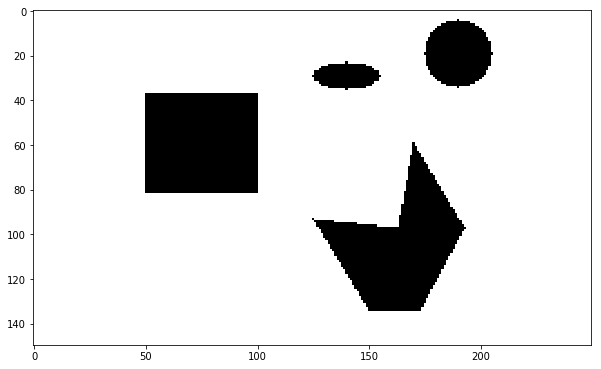

In [8]:
horizontal_img = cv2.flip(map.copy(), 0 )
plt.imshow(horizontal_img,cmap='binary')

In [9]:
pad= True
for i in range(0,breadth):
    for j in range(0,length):
        if(inside_rect(j,i,pad) or inside_circle(j,i,pad) or inside_ellipse(j,i,pad) or inside_poly(j,i,pad)):
            map[i][j]=1

# plt.imshow(map,cmap='binary')
# plt.rcParams["figure.figsize"] = (20,20)

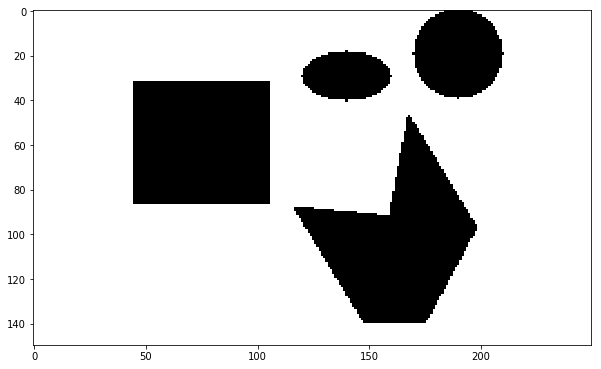

In [10]:
horizontal_img = cv2.flip(map.copy(), 0 )
plt.imshow(horizontal_img,cmap='binary')

In [11]:
xmin = 0
xmax = length
ymin = 0
ymax = breadth
Y, X = np.mgrid[ymin:ymax, xmin:xmax]
locations=np.vstack((X.ravel(), Y.ravel()))
# print(locations)
# plt.imshow(locations)
# print(locations)
X,np.shape(X),Y,np.shape(Y)


(array([[  0,   1,   2, ..., 247, 248, 249],
        [  0,   1,   2, ..., 247, 248, 249],
        [  0,   1,   2, ..., 247, 248, 249],
        ...,
        [  0,   1,   2, ..., 247, 248, 249],
        [  0,   1,   2, ..., 247, 248, 249],
        [  0,   1,   2, ..., 247, 248, 249]]),
 (150, 250),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [147, 147, 147, ..., 147, 147, 147],
        [148, 148, 148, ..., 148, 148, 148],
        [149, 149, 149, ..., 149, 149, 149]]),
 (150, 250))

In [12]:
def generate_map(breadth,length,pad):
    map = np.zeros((breadth,length))
    for i in range(0,breadth):
        for j in range(0,length):
            if(inside_rect(j,i,pad) or inside_circle(j,i,pad) or inside_ellipse(j,i,pad) or inside_poly(j,i,pad)):
                map[i][j]=1
    map = cv2.flip(map.copy(), 0 )
    return map
    

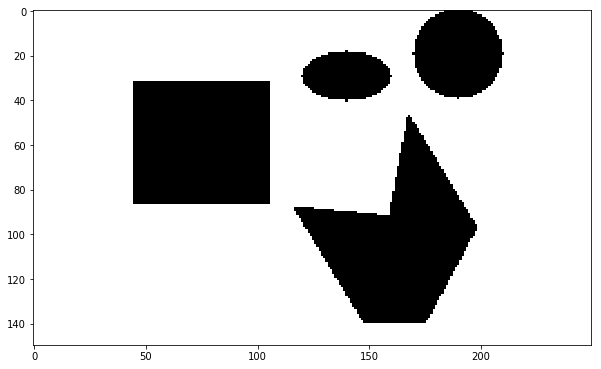

In [13]:
b_map = generate_map(breadth,length,True)
plt.imshow(b_map,cmap='binary')

In [14]:
dy = [-1,1,0,0,-1,1,-1,1]
dx = [0,0,-1,1,-1,-1,1,1]


In [15]:
if(dy[2] and dx[2]):
    print('true')
else:
    print('false')

false


In [16]:
b_map[60][55]

1.0

In [17]:
class node:
    def __init__(self,name,loc,parent_name = None,cost = float("inf")):
        self.name = name
        self.loc = loc
        self.parent_name = parent_name
        self.cost = cost
#     def get_cost(self):
#         return self.cost

In [18]:
x = 20
y = 60
for i in range(0,8):
    new_x = x+dx[i]
    new_y = y+dy[i]
    print(b_map[new_y][new_x])
    if(new_x<0 or new_y<0 or new_x>=length or new_y>=breadth or b_map[new_y][new_x]):
        continue
    print(new_x,new_y)
        

0.0
(20, 59)
0.0
(20, 61)
0.0
(19, 60)
0.0
(21, 60)
0.0
(19, 59)
0.0
(19, 61)
0.0
(21, 59)
0.0
(21, 61)


In [19]:
p1=node(1,(0,0))
p1.cost, p1.name, p1.parent_name,p1.loc

(inf, 1, None, (0, 0))

In [20]:
p1.parent_name = 2
p1.cost, p1.name, p1.parent_name

(inf, 1, 2)

In [21]:
############################ USE
node_map = []
# node location formula = i*length+j  ; i = row, j=col
for i in range(0,breadth):
    for j in range(0,length):
        node_map.append(node(i*length+j+1,(i,j)))


In [22]:
m=560
node_map[m].cost, node_map[m].name, node_map[m].parent_name,node_map[m].loc


(inf, 561, None, (2, 60))

In [23]:
start = [0,0]
goal = [60,60]
visited_nodes = np.zeros_like(b_map)
# print(visited_nodes, np.min(visited_nodes)) 
# checking validity of start and goal 
if(b_map[start[0]][start[1]]):
    print('Start state is invalid')
#     return
elif(b_map[goal[0]][goal[1]]):
    print('Goal state is invalid')
#     return




Goal state is invalid


In [24]:
diagonal_cost = 14
straight_cost = 10
def cal_cost_to_come(node, dx, dy):
    if(dy and dx):
        #diagonal
        return node.cost + diagonal_cost
    else:
        #straight path i.e. left, right, top, bottom
        return node.cost + straight_cost

In [25]:
def explore_neighbours(r,c,Q):
    for i in range(0,8):
        new_c = c+dx[i]
        new_r = r+dy[i]

        #check if the new location is within bounds
        if(new_c<0 or new_r<0 or new_c>=length or new_r>=breadth):
            continue

        #check if state is valid i.e not an obstacle
        if(b_map[new_r][new_c]):
            continue

        #check is the node is visited
        if(visited_nodes[new_r][new_c]):
            continue

        new_index = new_r*length+new_c
        index = r*length+c
        
        #calculate cost to come for newly generated node
        curr_cost = cal_cost_to_come(node_map[index], dx[i], dy[i])
        
        if(curr_cost<node_map[new_index].cost):
            #update cost of new node
            node_map[new_index].cost = curr_cost
            #update parent(name) of new node
            node_map[new_index].parent_name = node_map[index].name
            #add current node to heap
            heapq.heappush(Q,(node_map[new_index].cost, node_map[new_index].name, node_map[new_index]))
    visited_nodes[r][c] = 1
    return Q

In [26]:
def Dijkstra():
    Q = []
    heapq.heapify(Q) 
    # if not list(Q):
    #     print('empty2')
    index = start[0]*length+start[1]
    node_map[index].cost = 0
    heapq.heappush(Q,(node_map[index].cost, node_map[index].name, node_map[index]))
    while(list(Q)):
        current_node = heapq.heappop(Q)
        #print(current_node[0],current_node[1],current_node[2])
        curr_r = current_node[2].loc[0]
        curr_c = current_node[2].loc[1]
        #check node for duplicity in heap
        if(visited_nodes[curr_r][curr_c]):
            continue
        #check if the goal is reached
        if(curr_r == goal[0] and curr_c == goal[1]):
            print('success')
            return 'Success'

        #update heap after exploring neighbours
        Q = explore_neighbours(curr_r,curr_c,Q)
    return 'Failure'


In [27]:
current_node[2].loc[0]

NameError: name 'current_node' is not defined

In [28]:
node_map[0].cost

inf

In [29]:
li = []
node_map[0].cost = 0
heapq.heapify(li)

print('init cost ', node_map[0].cost)
heapq.heappush(li,(node_map[0].cost, node_map[0].name, node_map[0]))
node_map[0].cost = 3


('init cost ', 0)


In [30]:
li

[(0, 1, <__main__.node instance at 0x7fb47fb427a0>)]

In [31]:
dummy = heapq.heappop(li)
dummy[0],dummy[2].cost

(0, 3)

In [32]:
ab = [(1,9),(2,8),(3,7),(4,6)]
heapq.heapify(ab)
print(ab)
try:
    i = ab.index((1,9))
    ab[i] = ab[-1]
    ab.pop()
    heapq.heapify(ab)
except ValueError:
    print('add new element')
ab

[(1, 9), (2, 8), (3, 7), (4, 6)]


[(2, 8), (4, 6), (3, 7)]

In [33]:
tuple([1,2])==(1,2)

True

In [34]:
lol = []
lol.append(1)
lol

[1]

In [35]:
np.array((1,2))

array([1, 2])

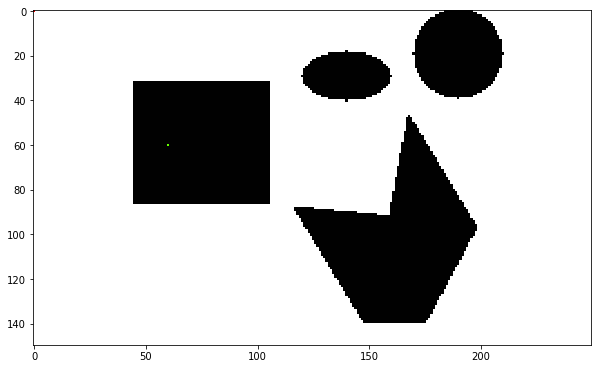

In [36]:
temp = copy.deepcopy(b_map)
temp[temp==0]=255
temp = np.asarray(temp,dtype=int)
visual_b_map = temp
visual_b_map = np.dstack((visual_b_map,temp,temp))
np.shape(visual_b_map)

visual_b_map[start[0]][start[1]] = [255,0,0]
visual_b_map[goal[0]][goal[1]] = [100,255,0]
plt.imshow(visual_b_map)

In [37]:
visual_b_map[0][0]

array([255,   0,   0])

In [38]:
# 0-255-255 - cyan

In [344]:
max(2-1,5-2)

3

In [345]:
a = 'RTHhJH'
a.lower()

'rthhjh'

In [41]:
start = [1,5]
start

[1, 5]

In [42]:
start[0],start[1] = start[1],start[0]
start

[5, 1]

In [44]:
start= np.divide(start,2)

start


array([2, 0])